<a href="https://colab.research.google.com/github/axvmoral/MATH-152/blob/main/bareminimum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration 1 
##Project 2: Epidemiology Models

# Abstract
The Susceptible, Infected, and Recovered (SIR) Model can be used to estimate the effect of infectous diseases in a population. In this paper, we seek to understand how the behavior of the model depends on its parameters, and the ratio between them. We accomplish this by reproducing the basic SIR model in a Python function, and then varying its parameters to understand its behavior. This is similarly done for an expanded SIR model that includes estimates for the populations of vaccinated and deceased individuals. The results of these variations are plotted using a Python plotting tool for ease of analysis. We find that the behavior of both the basic and expanded SIR models heavily depends on the size of its parameters and the Basic Reprodcution NUmber ratio between them. 


#Introduction

The basic Susceptible, Infected, and Recovered (SIR) Model is an epidemiological model that estimates the number of people within a population that are susceptible to, infected with, and recovered from a hyptothetical disease after a given time frame. The model estimates the trend of a disease in a population over a given time frame by way of the following formula: 

\begin{align}
S_{t+1} &= S_{t} - β\frac{I_{t}S_{t}}{N} \\
I_{t+1} &= I_{t} + β\frac{I_{t}S_{t}}{N} - \gamma I_{t} \\
R_{t+1} &= R_{t} + \gamma I_{t}
\end{align}

Here $N$ denotes the total population, and $S_{t}$, $I_{t}$, and $R_{t}$ denote the respective values for the susceptible population, infected population, and recovered population within $N$ at given time $t$. $β$ denotes the expected infection-producing contacts made by an infected individual per unit time, and $γ$ denotes the expected percentage of infected individuals that recover from the disease per unit time. 

This paper seeks to understand how the behavior of the SIR model depends on the paremters $β$ and $γ$, other added parameters, and in the Basic Reproduction Number (BRN) of a disease, which is commonly defined as $β/\gamma$. We accomplish this by first reproducing the basic model in a Python function for time unit days, which we use to understand how the model behaves over a year as the paremeters $β$ and $γ$ vary. Next, we expand the basic model to include realistic complications, including the population of the deceased, and the population of vaccinated individuals. We vary the parameters dictating the growth of these populations to understand how the model behaves with these additions. We find that the final values of these populations are extremely dependent on the size of any given parameter for both the basic and expanded models. The size of the different parameters determines the extreme volatility of the model. Similarly, the daily values exhibit extreme behavior as well. We determine how this behavior depends on the diseases BRN. 


#Methods

##The Basic and Expanded SIR Models
To explore how the SIR model behaves as the parameters $β$ and $γ$ vary, we reproduce the model in a Python function. Reproducing the model in a callable function has the benefit of easily computing the behavior of the model as we vary the parametrs of interest. Later, the function can be modified to include other parameters without much difficulty. The behavior of these modifications can be similarly computed with ease. The basic model is coded first, in the function defined below:

In [ ]:
def SIR(beta, gamma, t, N, S, I, R):
  '''
  This function models the spread of a disease in a population over a time
  frame. The time frame (time) is specified in days, the disease is specified 
  by its beta and gamma parameters; the population is specified by its 
  population size (N), its initial susceptible population size (S), its initial 
  infected population size (I), and its initial recovered population size (R). 
  This function calculates these parameters through a for loop in the range of 
  the specified time frame, and returns these values in global lists. 
  '''
  #We use "b" to denote "basic" for the basic model
  global Sb_list # Defining global variables so that the lists can be called outside of the function.
  global Ib_list 
  global Rb_list
  global BRNb
  BRNb = beta / gamma # the basic reproduction number
  Sb_list, Ib_list, Rb_list = [S], [I], [R] # creates lists to trace the values of S, I, and R over the time interval.
  for i in range(0,t):
    ISrN = (I*S)/N # This ensures we dont use the wrong (i.e. t+1) values of S and I at a given value t.
    S, I, R = S - beta*(ISrN), I + beta*(ISrN) - gamma*I, R + gamma*I
    Sb_list.append(S) # adds current value of S to the list S_list
    Ib_list.append(I) # adds current value of I to the list I_list
    Rb_list.append(R) # adds current value of R to the list R_list
  return 

The function takes in as arguments the different parameters which specify the disease and population of interest, and makes use of a for loop to compute the different SIR populations at any given day between day zero and the last day of the specified time frame. These values are added to three different lists, which can be globally called outside of the function. The function also computes the BRN of the specified disease, and prints out this number along with the three different populations values on the last day of the the time frame. 

Diseases often produce mortality within the populations they effect, however the basic SIR model suffers from not taking this realistic complication into account. Similar to the way $β$ and $γ$ were used, we define $\phi$ as the probability that an infected person dies in a given day. Using this new parameter, we can append a deathtoll equation to the basic SIR model. Similarly, we can modify the existing equation for the infected population. This is done as follows:

\begin{align} 
D_{t+1} &= D_t + \phi I_t \\
I_{t+1} &= I_t + \beta\frac{I_tS_t}{N} - \gamma I_t - D_{t}
\end{align}

Here $D_{t}$ is the population of deceased at day $t$, and the rest as previous. The former equation takes into account how often infected individuals die, and determines the growth of the deceased population from this dynamic.
The latter modification accounts for the reduction of infected individuals through mortality, given that, in this model, only the infected die.

More recently in history, diseases have been combated with the development and implementation of vaccines. Vaccines have the benefit of curbing the spread and mortality rate of a disease, and increasing its recovery rate. Like with the case of mortality, the basic SIR model does not take vaccination rates into account. We define a new parameter $\nu$ to denote the probability that a susceptible individual is vaccinated on any given day. In the basic SIR model, we append a new equation to model the population of vaccinated individuals, and modify the equation for the susceptible. These are done in the following way: 

\begin{align}
V_{t+1} &= V_{t} + \nu S_{t} \\
S_{t+1} &= S_{t} - β\frac{I_{t}S_{t}}{N} - V_{t}
\end{align}

The former is the new equation for the vaccinated population, and the latter is the modification to the susceptible population. $V_{t}$ is the population of vaccinated individuals at day $t$, and the rest as before. The reasoning for the former is motivated by the simple growth of the vaccinated population as determined by the rate of vaccination. The latter is motivated by the decrease of the susceptible population according to the growth of the vaccinated population.

Combining the changes and models made for mortality and vaccination, the basic SIR model can be expanded to include these realistic complications. This new expanded model more realistically models the spread of a specified disease in a given population. This expanded model is reproduced in a new Python function, which is simply created by combining the modifications made to the basic model function for both mortality and vaccination. It is defined as follows: 


In [ ]:
def SIRVD(beta, gamma, nu, phi, t, N, S, I, R, V, D):
  '''
  This function models the spread of a disease in a population over a time
  frame. The time frame (time) is specified in days, the disease is specified 
  by its beta and gamma parameters; the population is specified by its 
  population size (N), its initial susceptible population size (S), its initial 
  infected population size (I), its initial recovered population size (R), its
  initial vaccinated population (V), and its initial deceased populations (D). 
  This function calculates these parameters through a for 
  loop in the range of the specified time frame, and returns these values in
  a global list. 
  '''
  #We use "e" to denote "expanded" for the expanded model
  global Se_list # Defining global variables so that the lists can be called outside of the function.
  global Ie_list 
  global Re_list
  global Ve_list
  global De_list
  global BRNe
  BRNe = beta / gamma # the basic reproduction number
  Se_list, Ie_list, Re_list, Ve_list, De_list = [S], [I], [R], [V], [D] # creates lists to trace the values of S, I, R, V, and D over the time interval.
  for i in range(0,t):
    ISrN = (I*S)/N # This ensures we dont use the wrong (i.e. t+1) values of S and I at a given value t.
    S, I, R, V, D = S - beta*(ISrN) -V, I + beta*(ISrN) - gamma*I - D, R + gamma*I, V + nu*S, D + phi*I
    Se_list.append(S) # adds current value of S to the list S_list
    Ie_list.append(I) # adds current value of I to the list I_list
    Re_list.append(R) # adds current value of R to the list R_list
    Ve_list.append(V) # adds current value of V to the list R_list
    De_list.append(D) # adds current value of D to the list R_list
  return 

This new function takes in the intial deceased and vaccinated populations, and their respective rates $\phi$ and $\nu$, as arguments. It now computes the size of these populations for every day in a globally called list, and prints out their size at the end of the last day in the time frame. The rest is as previous. 


##Variation of Parameters

Our aim is to understand how the basic and expanded SIR models behave according to the different parameters, and the BRN. To accomplish this, we vary one parameter over a year period in our Python functions while the other parameters are held constant. We let a $N = 1,000,000$, $S_{t_0} = 999,000$, $I_{t_0} = 1,000$, and $R_{t_0}=0$ for the basic SIR model; we conserve $N_{t_0}$, $S_{t_0}$, and $R_{t_0}$ for the expanded model, but let $I_{t_0} = 800$, $V_{t_0} = 100,$ and $D_{t_0} = 100$. The varied parameter is initialized at a value of zero (except for gamma, which is initialized at $0.001$), and is increased by $0.001$ increments each time, up to a final value of one. This is done via a $for$ loop. We feel that this best allows us to observe the effects that each parameter has on the behaviour of our models. The results for the variation of each parameter under each model are plotted for ease of analysis. We also plot the basic and expanded model populations for every day for stationary parameters. The $for$ loops for each parameter and model are displayed here: 

In [ ]:
from matplotlib import pyplot as plt #to plot

In [ ]:
beta = 0 #initialize parameter
Sfinalvalues1 = [] #empty list for final values of S
Ifinalvalues1 = [] #empty list for final values of I
Rfinalvalues1 = [] #empty list for final values of R
betab_values1 = [] #empty list for the different beta parameters
for i in range(0,1000):
  SIR(beta, 0.025, 365, 1000000, 999000, 1000, 0) #varying the beta parameter for the basic model
  Sfinalvalues1.append(Sb_list[365]) #append final values of S
  Ifinalvalues1.append(Ib_list[365]) #append final values of I
  Rfinalvalues1.append(Rb_list[365]) #append final values of R
  betab_values1.append(beta) #append parameter value
  beta = beta + 0.001 #increment parameter

In [ ]:
gamma = 0.001 #initialize parameter
Sfinalvalues2 = [] #empty list for final values of S
Ifinalvalues2 = [] #empty list for final values of I
Rfinalvalues2 = [] #empty list for final values of R
gammab_values2 = [] #empty list for the different gamma parameters
for i in range(0,999):
  SIR(0.25, gamma, 365, 1000000, 999000, 1000, 0) #varying the gamma parameter for the basic model
  Sfinalvalues2.append(Sb_list[365]) #append final values of S
  Ifinalvalues2.append(Ib_list[365]) #append final values of I
  Rfinalvalues2.append(Rb_list[365]) #append final values of R
  gammab_values2.append(gamma) #append parameter value
  gamma = gamma + 0.001 #increment parameter

In [ ]:
beta = 0 #initialize parameter
Sfinalvalues3 = [] #empty list for final values of S
Ifinalvalues3 = [] #empty list for final values of I
Rfinalvalues3 = [] #empty list for final values of R
Vfinalvalues3 = [] #empty list for final values of V
Dfinalvalues3 = [] #empty list for final values of D
betae_values3 = [] #empty list for the different beta parameters
for i in range(0,1000):
  SIRVD(beta, 0.025, 0.01, 0.005, 365, 1000000, 999000, 800, 0, 100, 100) #varying the beta parameter for the expanded model
  Sfinalvalues3.append(Sb_list[365]) #append final values of S
  Ifinalvalues3.append(Ib_list[365]) #append final values of I
  Rfinalvalues3.append(Rb_list[365]) #append final values of R
  Vfinalvalues3.append(Ve_list[365]) #append final values of V
  Dfinalvalues3.append(De_list[365]) #append final values of D
  betae_values3.append(beta) #append parameter value
  beta = beta + 0.001 #increment parameter

In [ ]:
gamma = 0.001 #initialize parameter
Sfinalvalues4 = [] #empty list for final values of S
Ifinalvalues4 = [] #empty list for final values of I
Rfinalvalues4 = [] #empty list for final values of R
Vfinalvalues4 = [] #empty list for final values of V
Dfinalvalues4 = [] #empty list for final values of D
gammae_values4 = [] #empty list for the different beta parameters
for i in range(0,999):
  SIRVD(0.025, gamma, 0.01, 0.005, 365, 1000000, 999000, 800, 0, 100, 100) #varying the beta parameter for the expanded model
  Sfinalvalues4.append(Sb_list[365]) #append final values of S
  Ifinalvalues4.append(Ib_list[365]) #append final values of I
  Rfinalvalues4.append(Rb_list[365]) #append final values of R
  Vfinalvalues4.append(Ve_list[365]) #append final values of V
  Dfinalvalues4.append(De_list[365]) #append final values of D
  gammae_values4.append(gamma) #append parameter value
  gamma = gamma + 0.001 #increment parameter

In [ ]:
nu = 0 #initialize parameter
Sfinalvalues5 = [] #empty list for final values of S
Ifinalvalues5 = [] #empty list for final values of I
Rfinalvalues5 = [] #empty list for final values of R
Vfinalvalues5 = [] #empty list for final values of V
Dfinalvalues5 = [] #empty list for final values of D
nue_values5 = [] #empty list for the different beta parameters
for i in range(0,1000):
  SIRVD(0.025, 0.025, nu, 0.005, 365, 1000000, 999000, 800, 0, 100, 100) #varying the beta parameter for the expanded model
  Sfinalvalues5.append(Sb_list[365]) #append final values of S
  Ifinalvalues5.append(Ib_list[365]) #append final values of I
  Rfinalvalues5.append(Rb_list[365]) #append final values of R
  Vfinalvalues5.append(Ve_list[365]) #append final values of V
  Dfinalvalues5.append(De_list[365]) #append final values of D
  nue_values5.append(nu) #append parameter value
  nu = nu + 0.001 #increment parameter

In [ ]:
phi = 0 #initialize parameter
Sfinalvalues6 = [] #empty list for final values of S
Ifinalvalues6 = [] #empty list for final values of I
Rfinalvalues6 = [] #empty list for final values of R
Vfinalvalues6 = [] #empty list for final values of V
Dfinalvalues6 = [] #empty list for final values of D
phie_values6 = [] #empty list for the different beta parameters
for i in range(0,1000):
  SIRVD(0.025, 0.025, 0.01, phi, 365, 1000000, 999000, 800, 0, 100, 100) #varying the beta parameter for the expanded model
  Sfinalvalues6.append(Sb_list[365]) #append final values of S
  Ifinalvalues6.append(Ib_list[365]) #append final values of I
  Rfinalvalues6.append(Rb_list[365]) #append final values of R
  Vfinalvalues6.append(Ve_list[365]) #append final values of V
  Dfinalvalues6.append(De_list[365]) #append final values of D
  phie_values6.append(phi) #append parameter value
  phi = phi + 0.001 #increment parameter

# Results


  To facilitate our analysis on the behavior of the basic and expanded models, we plot the values computed in the Methods section here. We feel this allows a visual representation of the behavior of the models. For each plot, we explain the what is happening within the model, and why that may be the case.

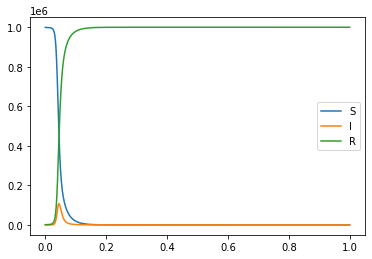

In [ ]:
S_basic_beta_plot = plt.plot(betab_values1, Sfinalvalues1, label = "S")
I_basic_beta_plot = plt.plot(betab_values1, Ifinalvalues1, label = "I")
R_basic_beta_plot = plt.plot(betab_values1, Rfinalvalues1, label = "R")
plt.legend()

**Exploring the final values from Basic SIR model as $\beta$ increases and $\gamma=0.025$:**
*   the final values of the Susceptible population decline rapidly and approaches 0 at the last day of the time frame.
*   the final values of the Infected population slightly increased then decreased and stayed consistantly near 0 at the last day of the time frame.
*   the final values of the Recovered population rapidly increases and approaches the values of the total population at the last day of the time frame.

**Explanation:**
The reason that the final values for the Infected population only had a small increase then sudden decrease was beause when the BRN ratio gets large enough, The Total Population becomes Infected faster thus making the Susceptible population reach zero sooner. However, the high ratio also means that the Recovery rate is much faster, so even though the entire population eventually becomes infected, they are recovering fast enough that by the last day of the time frame, the total population has already been infected and recovered.

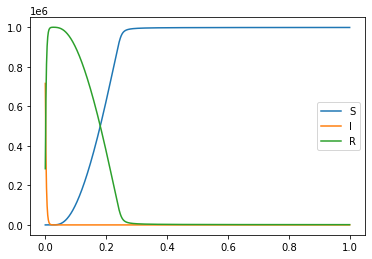

In [ ]:
S_basic_gamma_plot = plt.plot(gammab_values2, Sfinalvalues2, label = "S")
I_basic_gamma_plot = plt.plot(gammab_values2, Ifinalvalues2, label = "I")
R_basic_gamma_plot = plt.plot(gammab_values2, Rfinalvalues2, label = "R")
plt.legend()

**Exploring the final values from Basic SIR model as $\gamma$ increases and $\beta=0.25$:**
*   the final values of the Susceptible population has a steady increase that approaches the value of the total population at the last day of the time frame.
*   the final values of the Infected population has a rapid decline and approaches 0 immediatly and remain at zero  at the last day of the time frame.
*   the final values of the Recovered population on the last day of the time fram has a rapid incline followed by a steady decline that approaches 0. The final values of the Recovered population remain at zero at the last day of the time frame.

**Explanation:**
The reason the final values of the Infected population immediatly approached 0 as the value for $\gamma$ increased was because the BRN ratio was getting so small that the Infected population stopped infecting other individuals and only recovered. That is why the final values of Susceptiable population stopped decreasing and eventually stayed consistently near the value of the total population.

No handles with labels found to put in legend.


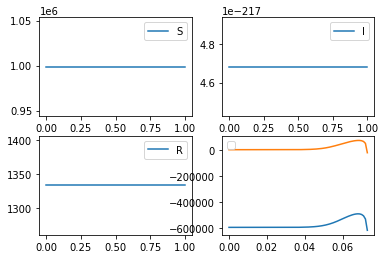

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(223)
plot4 = fig.add_subplot(224)
plot1.plot(betae_values3, Sfinalvalues3, label = "S")
plot2.plot(betae_values3, Ifinalvalues3, label = "I")
plot3.plot(betae_values3, Rfinalvalues3, label = "R")
plot4.plot(betae_values3, Vfinalvalues3, betae_values3, Dfinalvalues3) #V is blue
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plt.show()

**Exploring final values of SIRVD from SIRVD model as $\beta$ increases and $γ=0.025,nu=0.01,\phi=0.005$**


*   The plot of the final values of the Susceptible population shows that as $\beta$ increases, the final values of the susceptible population remain constantly at the value of the total population.
*   The plot of the final vlaues of the Infected population also remain consistent but at a very small number.
*   The plot of the final values of the Recovered population similarly stays consistantly in the range $1300<R<1350$.
*   Lastly, we can see that the plots of the final values of the Vaccinated and Mortality both ramain mostly consistent but then have a steady increase towards that large values of $\beta$




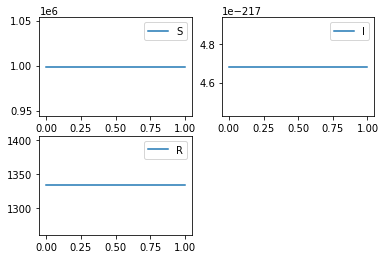

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(223)
plot1.plot(gammae_values4, Sfinalvalues4, label = "S")
plot2.plot(gammae_values4, Ifinalvalues4, label = "I")
plot3.plot(gammae_values4, Rfinalvalues4, label = "R")
plot1.legend()
plot2.legend()
plot3.legend()
plt.show()

**Exploring the final values of SIR from SIRVD model as $\gamma$ increases and $β=0.25,nu=0.01,\phi=0.005$**


*   The plot of the final values of the Susceptible population shows that as $\gamma$ increases, the final values of the susceptible population remain constantly at the value of the total population.
*   The plot of the final vlaues of the Infected population also remain consistent but at a very small number.
*   The plot of the final values of the Recovered population similarly stays consistantly in the range $1300<R<1350$.

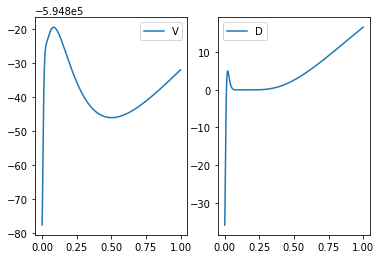

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(121)
plot2 = fig.add_subplot(122)
plot1.plot(gammae_values4, Vfinalvalues4, label = "V")
plot2.plot(gammae_values4, Dfinalvalues4, label = "D")
plot1.legend()
plot2.legend()
plt.show()

**Exploring the final values of V and D from SIRVD model as $\gamma$ increases and $\beta=0.25,nu=0.01,\phi=0.005$**
*   The plot of the final values of the population that is vaccinated demonstrates an initial rapid increase but is followed by a decrease that steadily moves up.
*   The plot of the final values of the population of the deceased is similar to that of the vaccination. However, it the curve is not as smooth.



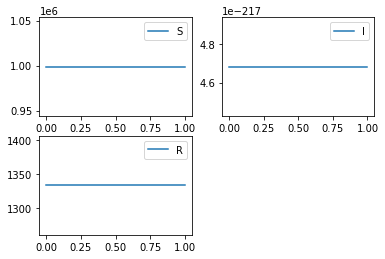

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(223)
plot1.plot(nue_values5, Sfinalvalues5, label = "S")
plot2.plot(nue_values5, Ifinalvalues5, label = "I")
plot3.plot(nue_values5, Rfinalvalues5, label = "R")
plot1.legend()
plot2.legend()
plot3.legend()
plt.show()

**Exploring final values of SIR from SIRVD model as $nu$ increases and $β=0.25,\gamma=0.025,\phi=0.005$**


*   Similarly to the plots of when $\gamma$ and $\beta$ were changing, the plot of the final values of the Susceptible population shows that as $nu$ increases, the final values of the susceptible population remain constantly at the value of the total population.
*   The plot of the final vlaues of the Infected population also remain consistent but at a very small number.
*   The plot of the final values of the Recovered population similarly stays consistantly in the range $1300<R<1350$.

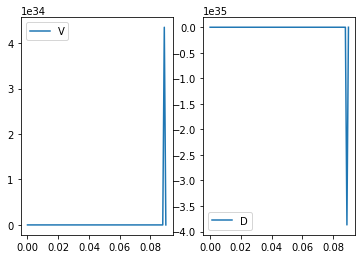

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(121)
plot2 = fig.add_subplot(122)
plot1.plot(phie_values6, Vfinalvalues6, label = "V")
plot2.plot(phie_values6, Dfinalvalues6, label = "D")
plot1.legend()
plot2.legend()
plt.show()

**Result of final values of V and D from SIRVD model as $\phi$ increases and $\beta=0.25,\gamma=0.025,nu=0.01$**
*   The plot of the final values of the population that is vaccinated remains near the value of 0 until the last values of $\phi$ where it has an rapidly increased and rapidly decreased.
*   The plot of the final values of the population of the deceased is similar to that of the vaccination but instead of rapidly decreasing first, it rapidly deacred and was followed by rapidly increasing.


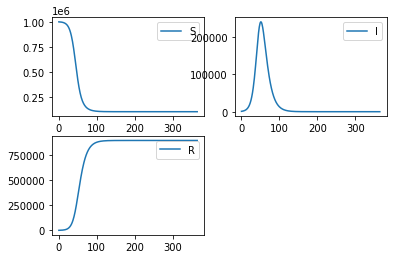

In [ ]:
SIR(0.25, 0.1, 365, 1000000, 999000, 1000, 0)
fig = plt.figure()
plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(223)
plot1.plot(list(range(0,366)), Sb_list, label = "S")
plot2.plot(list(range(0,366)), Ib_list, label = "I")
plot3.plot(list(range(0,366)), Rb_list, label = "R")
plot1.legend()
plot2.legend()
plot3.legend()
plt.show()

**Exploring the lists of the values of SIR in a Basic SIR model with parameters $\beta=0.25,\gamma=0.01,N=1000000,S=999000,I=1000,R=0:$**
*   The plot of every value in the list S begins with most of the population being Susceptible but after about 100 days, the Susceptible population is near 0
*   The plot of every value in the list I has an exponential growth within the first 50 days, but by the 100th day, the values of the list appraoch 0.
*   Latly, the plot of the overy value in the list R begins with a large incline and by the 100th day, the Recovered population is approaching the total value of the population.

**Explanation:**
We observed in an earlier plot that $\beta$ grew larger, the BRN ratio would also grow, and the rate of infection would be so high that the Susceptible population would apporach 0 in fewer days. However, we also noticed that the Recovery rate would also be high which will result in the majority of the population to recover faster leaving the Reovered population to be near the value of the entire population.



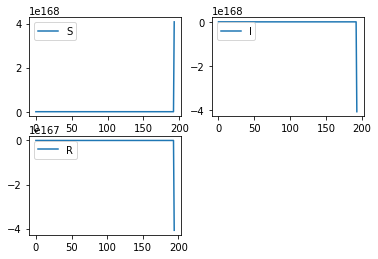

In [ ]:
SIRVD(0.25, 0.1, 0.01, 0.005, 365, 1000000, 999000, 800, 0, 100, 100)
fig = plt.figure()
plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(223)
plot1.plot(list(range(0,366)), Se_list, label = "S")
plot2.plot(list(range(0,366)), Ie_list, label = "I")
plot3.plot(list(range(0,366)), Re_list, label = "R")
plot1.legend()
plot2.legend()
plot3.legend()
plt.show()

**Exploring the vlists of values of SIR in an SIRVD model with parameters $\beta=0.25,\gamma=0.01,,nu=0.01,\phi=0.005,N=1000000,S=999000,I=800,R=0,V=100,D=100:$**
*   The plot of every value in the Susceptible list begins with the population values intially remainging close to 0 and towards the end of the year, having a large increase in values.
*   The plot of the every value in the Infected list begins near 0 and by the end of the time frame has a sudden drop in values.
*   Similarly to the Infected plot, the plot of every value in the Recovered list begins with near 0 and by the end of the time frame, it has a rapid decrease in values.

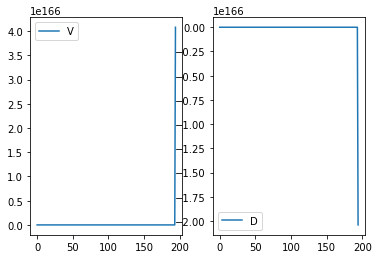

In [ ]:
fig = plt.figure()
plot1 = fig.add_subplot(121)
plot2 = fig.add_subplot(122)
plot1.plot(list(range(0,366)), Ve_list, label = "V")
plot2.plot(list(range(0,366)), De_list, label = "D")
plot1.legend()
plot2.legend()
plt.show()

**Result of all the values in of the V and D list in an SIRVD model with parameters $\beta=0.25,\gamma=0.01,,nu=0.01,\phi=0.005,N=1000000,S=999000,I=800,R=0,V=100,D=100:$**
*   The plot of every value in the list V remains consistently close to 0 throughout most of the year, but by the end of the time frame there is a large increase in values.
*   The plot of every value in the list of D remains consistently close to 0 through most of the year and towards the end of the time frame, unlike the vaccination list, there is a sudden decrease in values.

# Conclusion
Ultimately, the BRN value plays a critical role in determining the outcome of the population of the infected and the population of the recovered in a given time  t . Generally, we can observe in the results that if the BRN increases as a result from an increasing $\beta$, the faster the population gets infected and the faster they recover. Though with a higher BRN ratio the entire popultion recovers, we also observed that with a higher BRN ratio, every indidivual in the population gets infected at some point within the time frame. However, as the BRN ratio decreases as a result of an increasing $\gamma$, we realized that the infection rate slows down dramatically. If the BRN decreases enough, we see that Infected population stop infecting others and only recover. Therefore in an ideal situation, we would want the decrease the BRN ratio by increasing the rate at which people are recovering.

Though this SIR model can be used to approximate the size of the susceptible, infected, and recovered population at any given time throughout an epidemic, there are several factors that were not accounted for. We created these models under the assumption that the rate at which people were spreading the infection and the rate at which people were recovering were constants. Addittionally, we also assumed that the deaths caused in one year within the population  N  were caused purely from the disease. We also neglected to consider the chance of births occuring within this population of people. Further expansions on the basic model are needed to include these further realistic complications.